<h2 style='color:blue' align="center">Support Vector Machine Tutorial Using Python Sklearn</h2>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img height=300 width=300 src="iris_petal_sepal.png" />

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [11]:
import matplotlib.pyplot as plt

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

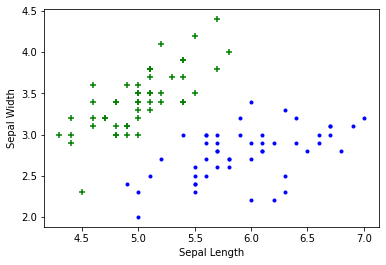

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

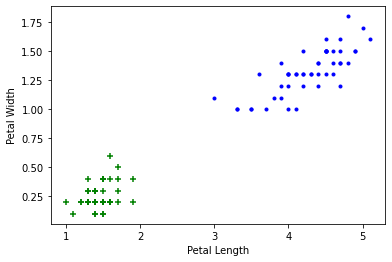

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')

**Train Using Support Vector Machine (SVM)**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_name'], axis=1)
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [21]:
model.score(X_test, y_test)

1.0

In [22]:
model.predict([[4.8, 3.0, 1.5, 0.3]])

array([0])

**Tune parameters**

**1. Regularization (C)**

In [23]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [24]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

**2. Gamma**

In [25]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

**3. Kernel**

In [26]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size
